In [40]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [41]:
RunManager.get_run_names('StatArbStrategy')[-30:]

,RunName,RunDate,Completed,Description
36,run_0124,2018-07-23,True,"Sector 20, v5 update"
37,run_0125,2018-07-24,True,"Sector 25, v5 update"
38,run_0126,2018-07-24,True,"Sector 35, v5 update"
39,run_0127,2018-07-24,False,"Sector 45, v5 update"
40,run_0130,2018-07-24,True,"Sector 20, v6 momentum"
41,run_0131,2018-07-25,True,"Sector 25, v6 momentum"
42,run_0132,2018-07-25,True,"Sector 35, v6 momentum"
43,run_0133,2018-07-25,False,"Sector 45, v6 momentum"
44,run_0134,2018-07-25,True,"Sector 20, v6 momentum SWITCH"
45,run_0135,2018-07-25,True,"Sector 25, v6 momentum SWITCH"


In [3]:
runB = RunManager('StatArbStrategy', 'run_0124')

In [24]:
run1 = RunManager('StatArbStrategy', 'run_0153')
run2 = RunManager('StatArbStrategy', 'run_0154')
run3 = RunManager('StatArbStrategy', 'run_0155')

In [25]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,clusters,False,288,1.045126,0.085783,-999.0
1,clusters,True,288,0.766185,0.088220,-999.0
2,data_rank_flag,False,288,0.959396,0.092727,-999.0
3,data_rank_flag,True,288,0.851914,0.081276,-999.0
4,drop_binaries,False,288,0.922221,0.088681,-999.0
5,drop_binaries,True,288,0.889090,0.085322,-999.0
6,holding_period,3,192,0.944899,0.087970,-999.0
7,holding_period,5,192,0.905783,0.087299,-999.0
8,holding_period,7,192,0.866284,0.085735,-999.0
9,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",576,0.905655,0.087002,-999.0


In [26]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,clusters,False,288,0.489848,0.044030,-999.0
1,clusters,True,288,0.393337,0.048403,-999.0
2,data_rank_flag,False,288,0.403455,0.042201,-999.0
3,data_rank_flag,True,288,0.479730,0.050231,-999.0
4,drop_binaries,False,288,0.454192,0.047744,-999.0
5,drop_binaries,True,288,0.428993,0.044688,-999.0
6,holding_period,3,192,0.570615,0.057741,-999.0
7,holding_period,5,192,0.408360,0.043069,-999.0
8,holding_period,7,192,0.345803,0.037839,-999.0
9,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",576,0.441593,0.046216,-999.0


In [27]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,clusters,False,288,0.629648,0.041543,-999.0
1,clusters,True,288,0.491597,0.050177,-999.0
2,data_rank_flag,False,288,0.541650,0.043358,-999.0
3,data_rank_flag,True,288,0.579595,0.048362,-999.0
4,drop_binaries,False,288,0.576829,0.047432,-999.0
5,drop_binaries,True,288,0.544416,0.044288,-999.0
6,holding_period,3,192,0.658046,0.051813,-999.0
7,holding_period,5,192,0.538377,0.044297,-999.0
8,holding_period,7,192,0.485444,0.041470,-999.0
9,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",576,0.560623,0.045860,-999.0


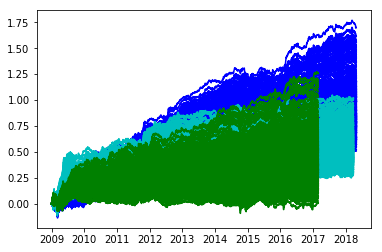

In [28]:
plt.figure()
plt.plot(run1.returns.dropna().cumsum(), 'b')
plt.plot(run3.returns.dropna().cumsum(), 'c')
plt.plot(run2.returns.dropna().cumsum(), 'g')
plt.show()

# Explore sector 45

In [36]:
drop_params = [('clusters', True), ('holding_period', 5), 
               ('holding_period', 7), ('per_side_count', 20), 
               ('score_var', 'boll_40'),
               ('score_var', 'boll2_40'),
               ('score_var', 'boll4_160'),
               ('score_var', 'prma_4_80')]

run2a = RunManager('StatArbStrategy', 'run_0154', drop_params=drop_params)

In [37]:
# Create combo search
comb2a = CombinationSearch()
comb2a.set_selection_criteria('sharpe')
comb2a.params['training_epochs'] = 20

comb2a.add_run(run2a)
comb2a.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [02:22<00:00,  7.10s/it]


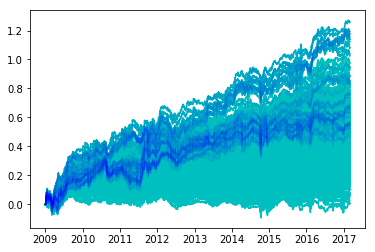

In [38]:
plt.figure()
plt.plot(run2.returns.dropna().cumsum(), 'c')
plt.plot(run2a.returns.dropna().cumsum(), 'b', alpha=0.1)
plt.show()

In [39]:
df = rollup_returns(comb2a.best_results_returns)
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,0.000000,0.000000,0.000000,0.000000,0.000000
2010,0.032419,0.010747,-0.027535,0.048760,0.064392
2011,0.012070,-0.011283,0.000679,0.038399,0.039865
2012,0.070480,-0.079577,0.043559,0.058560,0.093021
2013,-0.012633,0.026006,0.015267,0.055602,0.084243
2014,0.051765,0.005824,-0.052594,0.021412,0.026407
2015,0.031713,0.032450,-0.009625,0.056424,0.110961
2016,0.076824,0.004193,0.017299,0.013665,0.111981
2017,0.028600,NaN,NaN,NaN,0.028600


# Explore Top 300

In [17]:
run3 = RunManager('StatArbStrategy', 'run_0155')
run3.import_return_frame()

In [29]:
drop_params = [('clusters', True), ('holding_period', 5), 
               ('holding_period', 7), ('per_side_count', 20), 
               ('score_var', 'boll_40'),
               ('score_var', 'boll2_40'),
               ('score_var', 'boll4_160'),
               ('score_var', 'prma_4_80')]

run3a = RunManager('StatArbStrategy', 'run_0155', drop_params=drop_params)

In [30]:
run3a.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,clusters,False,32,0.872695,0.045162,-999.0
1,data_rank_flag,False,16,0.880300,0.044314,-999.0
2,data_rank_flag,True,16,0.865090,0.046010,-999.0
3,drop_binaries,False,16,0.865444,0.044907,-999.0
4,drop_binaries,True,16,0.879946,0.045417,-999.0
5,holding_period,3,32,0.872695,0.045162,-999.0
6,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",32,0.872695,0.045162,-999.0
7,per_side_count,10,32,0.872695,0.045162,-999.0
8,response_days,5,32,0.872695,0.045162,-999.0
9,response_type,Simple,32,0.872695,0.045162,-999.0


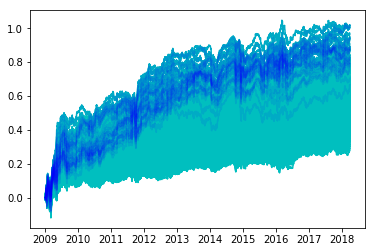

In [31]:
plt.figure()
plt.plot(run3.returns.dropna().cumsum(), 'c')
plt.plot(run3a.returns.dropna().cumsum(), 'b', alpha=0.1)
plt.show()

In [32]:
# Create combo search
comb3a = CombinationSearch()
comb3a.set_selection_criteria('sharpe')
comb3a.params['training_epochs'] = 20

comb3a.add_run(run3a)
comb3a.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [02:49<00:00,  8.57s/it]


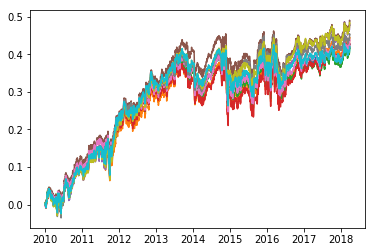

In [33]:
plt.figure()
plt.plot(comb3a.best_results_returns.dropna().cumsum())
plt.show()

In [35]:
df = rollup_returns(comb3a.best_results_returns)
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,0.000000,0.000000,0.000000,0.000000,0.000000
2010,0.008675,-0.006232,0.055790,0.033582,0.091815
2011,0.030756,0.030905,-0.069993,0.128744,0.120412
2012,0.026859,0.015383,0.050911,0.008949,0.102101
2013,0.004573,0.031524,0.035120,-0.026648,0.044569
2014,-0.063397,0.037963,0.048091,-0.064185,-0.041528
2015,-0.000431,0.015169,-0.002539,0.022681,0.034880
2016,0.007300,-0.037974,0.040886,0.008654,0.018866
2017,0.012522,0.007800,0.026938,-0.030152,0.017109


# Combo Search

In [23]:
# Create combo search
comb1 = CombinationSearch()
comb1.set_selection_criteria('sharpe')
comb1.params['training_epochs'] = 20

comb1.add_run(run1)
comb1.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:04<00:00,  9.23s/it]


In [24]:
# Create combo search
comb2 = CombinationSearch()
comb2.set_selection_criteria('mean')
comb2.params['training_epochs'] = 20

comb2.add_run(run1)
comb2.start()

  0%|          | 0/20 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 20/20 [02:40<00:00,  7.89s/it]


In [29]:
# Create combo search
combB = CombinationSearch()
combB.set_selection_criteria('mean')
combB.params['training_epochs'] = 20

combB.add_run(runB)
combB.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:19<00:00,  9.85s/it]


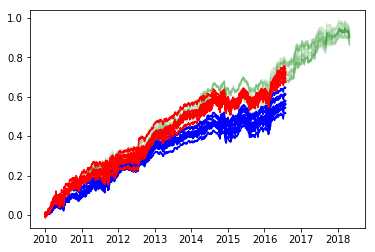

In [31]:
plt.figure()
plt.plot(combB.best_results_returns.dropna().cumsum(), 'g', alpha=0.2)
plt.plot(comb1.best_results_returns.dropna().cumsum(), 'b')
plt.plot(comb2.best_results_returns.dropna().cumsum(), 'r')

plt.show()